## Finetuning YOLO11n

In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')
data_path = "/kaggle/input/t-bank-contest-datasets/datasets/data.yaml"
output_name = "runs4"
project_name = "fine-tuned-yolo4"
results = model.train(
    data=data_path, 
    epochs=300, 
    imgsz=640,
    patience=30,
    project=project_name,
    name=output_name,       
)

Ultralytics 8.3.200 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/t-bank-contest-datasets/datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=runs4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=30, perspec

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         35         20      0.997          1      0.995      0.947
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /kaggle/working/fine-tuned-yolo4/runs4


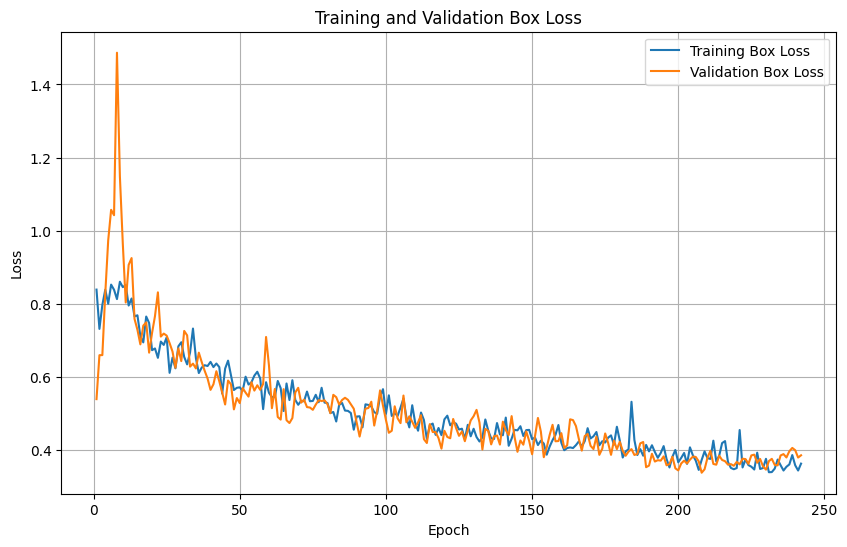

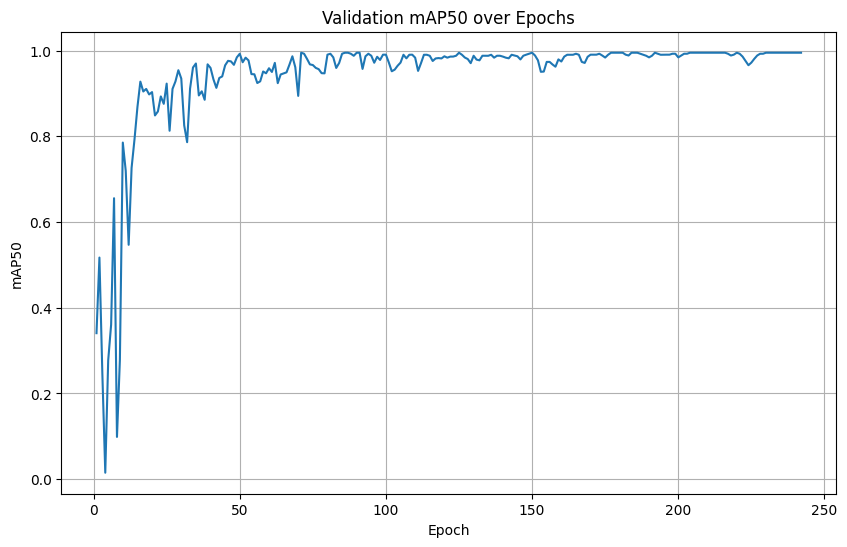

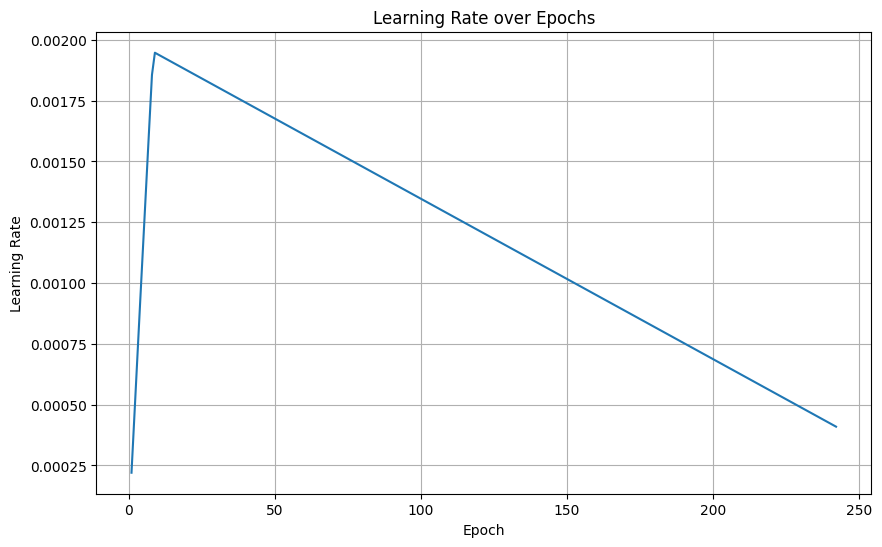

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results_path = f"{project_name}/{output_name}/results.csv"

try:
    df = pd.read_csv(results_path)
    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['train/box_loss'], label='Training Box Loss')
    plt.plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss')
    plt.title('Training and Validation Box Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['metrics/mAP50(B)'])
    plt.title('Validation mAP50 over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('mAP50')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['lr/pg0'])
    plt.title('Learning Rate over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print(f"Results file not found at {results_path}. Please check the path.")

In [ ]:
best_model = YOLO(f"{project_name}/{output_name}/weights/best.pt")
metrics = best_model.val(data=data_path)

print(f"mAP50-95: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP75: {metrics.box.map75}")

Ultralytics 8.3.200 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 103.1±75.3 MB/s, size: 48.8 KB)
val: Scanning /kaggle/input/t-bank-contest-datasets/datasets/valid/labels... 35 images, 16 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 35/35 960.8it/s 0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/t-bank-contest-datasets/datasets/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 2.9it/s 1.0s0.8s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         35         20      0.997          1      0.995      0.947
Speed: 0.9ms preprocess, 9.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/runs/detect/val3
mAP50-95: 0.9469695340501794
mAP50: 0.995
mAP75: 0.995



image 1/9 /kaggle/input/for-demonstration/demonstration/3-19.png: 320x640 3 logos, 11.1ms

--- Detections in: /kaggle/input/for-demonstration/demonstration/3-19.png ---
Detected T-Bank Logo with confidence: 0.96
Bounding Box Coordinates (xyxy): [71.43556213378906, 337.59747314453125, 153.47064208984375, 428.007568359375]
Detected T-Bank Logo with confidence: 0.94
Bounding Box Coordinates (xyxy): [281.1107177734375, 95.79267883300781, 334.04193115234375, 148.65367126464844]
Detected T-Bank Logo with confidence: 0.88
Bounding Box Coordinates (xyxy): [499.8641052246094, 254.6190185546875, 750.1118774414062, 500.0]


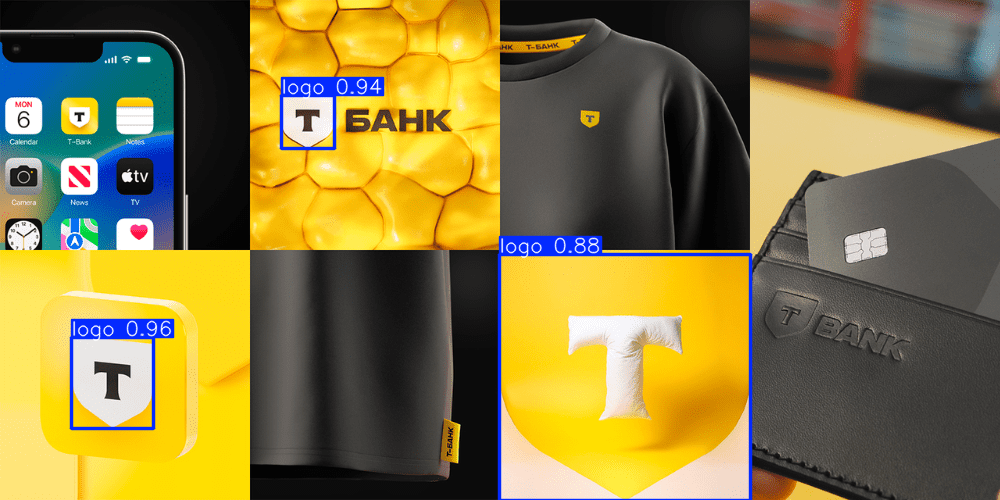

image 2/9 /kaggle/input/for-demonstration/demonstration/e7c677d8dc52__.png: 640x640 1 logo, 12.7ms

--- Detections in: /kaggle/input/for-demonstration/demonstration/e7c677d8dc52__.png ---
Detected T-Bank Logo with confidence: 0.76
Bounding Box Coordinates (xyxy): [85.3826904296875, 93.5581283569336, 314.8211975097656, 306.90313720703125]


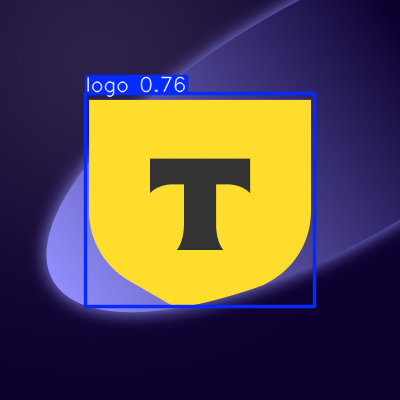

image 3/9 /kaggle/input/for-demonstration/demonstration/i.webp: 256x640 1 logo, 13.1ms

--- Detections in: /kaggle/input/for-demonstration/demonstration/i.webp ---
Detected T-Bank Logo with confidence: 0.93
Bounding Box Coordinates (xyxy): [61.567440032958984, 47.20458984375, 168.98275756835938, 150.9528350830078]


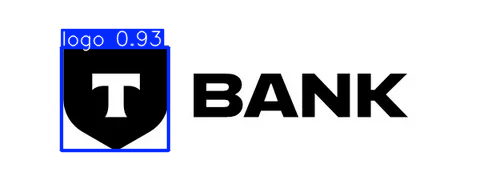

image 4/9 /kaggle/input/for-demonstration/demonstration/media_66a1238ec3ac2.png: 512x640 (no detections), 12.8ms

--- No detections in: /kaggle/input/for-demonstration/demonstration/media_66a1238ec3ac2.png ---
image 5/9 /kaggle/input/for-demonstration/demonstration/scale_1200-2.jpeg: 384x640 1 logo, 12.8ms

--- Detections in: /kaggle/input/for-demonstration/demonstration/scale_1200-2.jpeg ---
Detected T-Bank Logo with confidence: 0.95
Bounding Box Coordinates (xyxy): [454.23089599609375, 303.61163330078125, 530.433349609375, 382.532470703125]


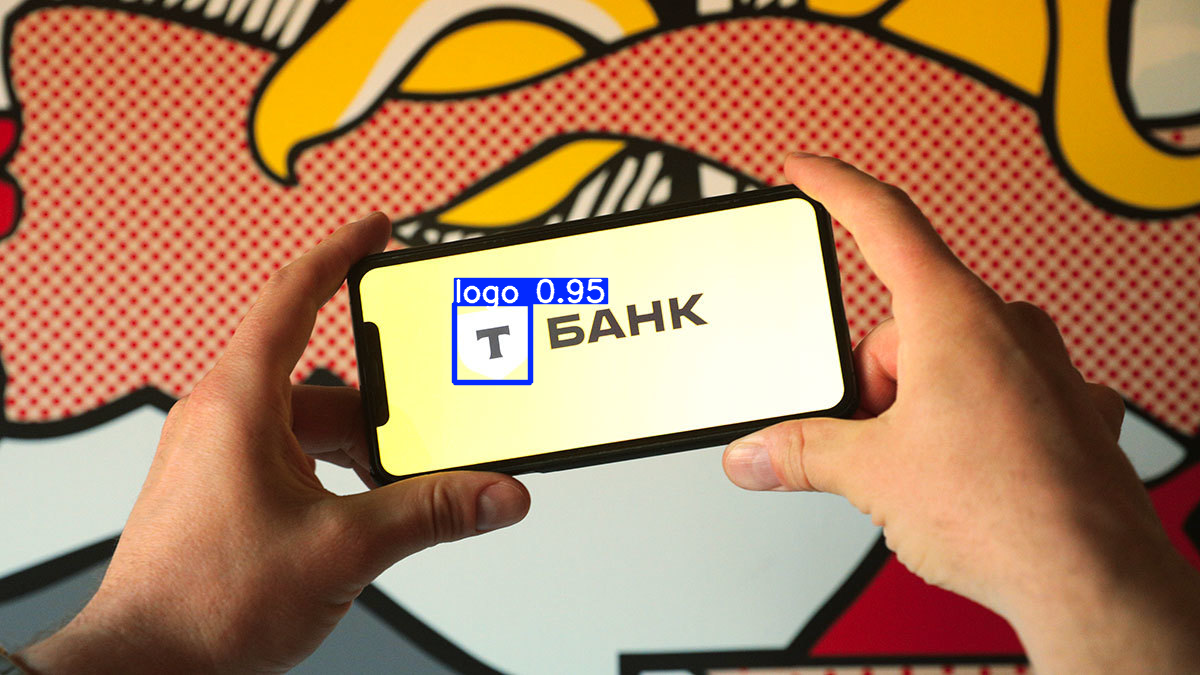

image 6/9 /kaggle/input/for-demonstration/demonstration/scale_1200-2.png: 416x640 3 logos, 12.1ms

--- Detections in: /kaggle/input/for-demonstration/demonstration/scale_1200-2.png ---
Detected T-Bank Logo with confidence: 0.88
Bounding Box Coordinates (xyxy): [130.5364227294922, 368.2596740722656, 158.47239685058594, 398.0950012207031]
Detected T-Bank Logo with confidence: 0.88
Bounding Box Coordinates (xyxy): [391.8365478515625, 367.1712951660156, 418.37744140625, 397.8008728027344]
Detected T-Bank Logo with confidence: 0.87
Bounding Box Coordinates (xyxy): [57.108577728271484, 225.27503967285156, 83.03103637695312, 253.9347686767578]


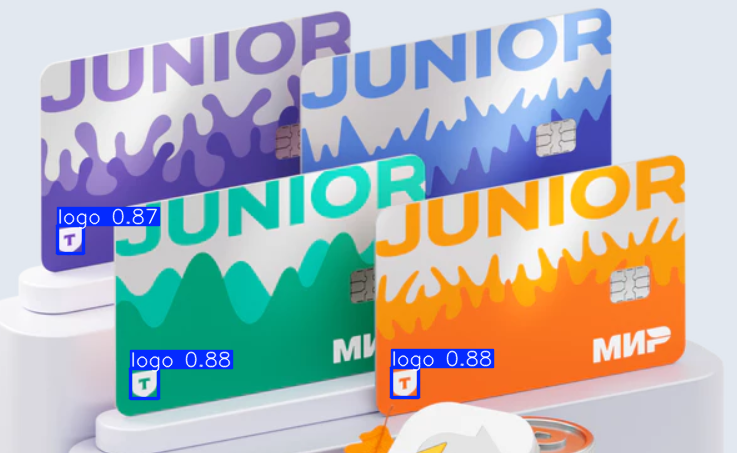

image 7/9 /kaggle/input/for-demonstration/demonstration/scale_1200-3.jpeg: 512x640 (no detections), 12.1ms

--- No detections in: /kaggle/input/for-demonstration/demonstration/scale_1200-3.jpeg ---
image 8/9 /kaggle/input/for-demonstration/demonstration/scale_1200.jpeg: 288x640 1 logo, 10.5ms

--- Detections in: /kaggle/input/for-demonstration/demonstration/scale_1200.jpeg ---
Detected T-Bank Logo with confidence: 0.88
Bounding Box Coordinates (xyxy): [709.4486083984375, 256.5609130859375, 755.536376953125, 291.9015197753906]


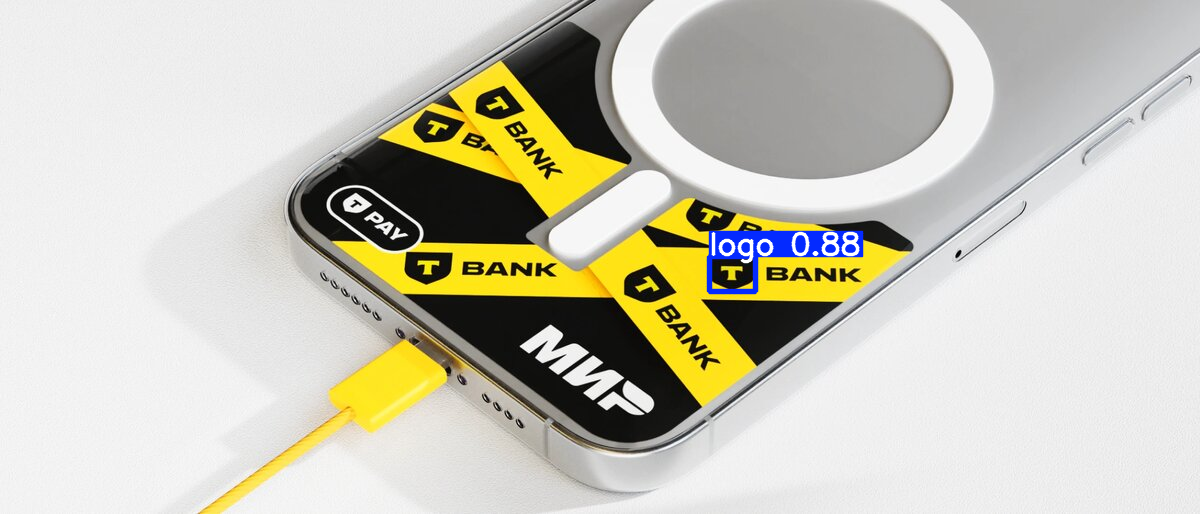

image 9/9 /kaggle/input/for-demonstration/demonstration/scale_1200.png: 288x640 1 logo, 10.2ms

--- Detections in: /kaggle/input/for-demonstration/demonstration/scale_1200.png ---
Detected T-Bank Logo with confidence: 0.89
Bounding Box Coordinates (xyxy): [678.3295288085938, 46.316314697265625, 715.4751586914062, 85.94214630126953]


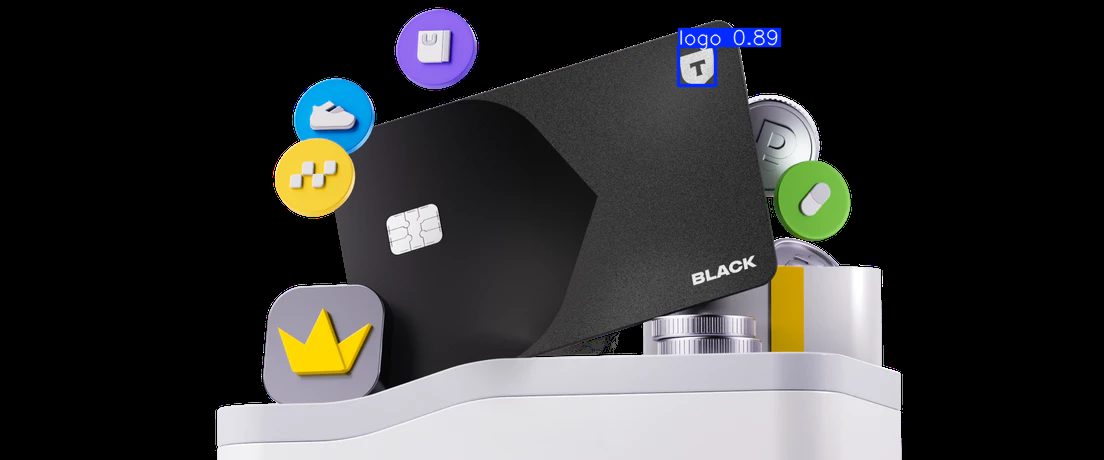

Speed: 2.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 640)


In [ ]:
import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

demonstrations_folder = '/kaggle/input/for-demonstration/demonstration'

if not os.path.isdir(demonstrations_folder):
    print(f"Error: The folder '{demonstrations_folder}' was not found.")
else:
    results = best_model.predict(source=demonstrations_folder, save=False, stream=True)
    for result in results:
        image_path = result.path
        
        if result.boxes.xyxy.numel() > 0:
            print(f"\n--- Detections in: {image_path} ---")
            for box in result.boxes:
                print(f"Detected T-Bank Logo with confidence: {box.conf.item():.2f}")
                print(f"Bounding Box Coordinates (xyxy): {box.xyxy.tolist()[0]}")
            annotated_image = result.plot()
            cv2_imshow(annotated_image)
        else:
            print(f"\n--- No detections in: {image_path} ---")